In [46]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
from tools.utils import *
import pandas as pd
import numpy as np
import seaborn as sns
from itertools import combinations
from collections import Counter
from pathlib import Path
from sklearn.cluster import KMeans
from scipy.interpolate import interp1d
import scipy.spatial as sp
sns.set()

In [48]:
processed_data_dir = Path('processed_data')

In [49]:
embeddings = np.loadtxt(processed_data_dir / 'embedding.tsv')
metadata = pd.read_csv(processed_data_dir / 'metadata.tsv',sep='\t')
print(len(embeddings), len(metadata))

105245 105245


# Compare two contracts 

Based on the platform name and date

<Axes: >

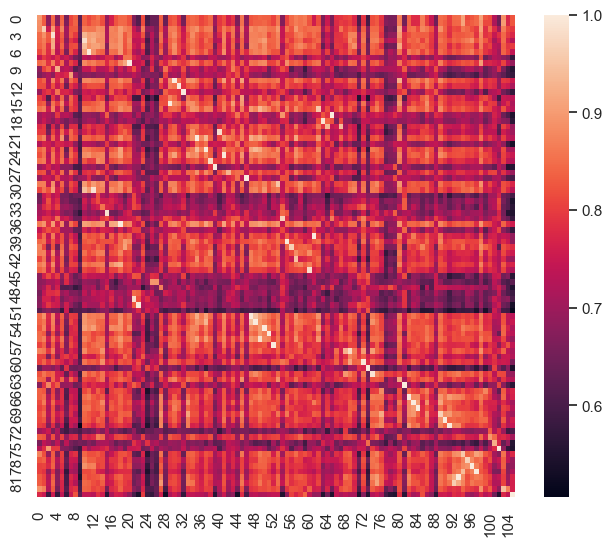

In [5]:
platform_1 = 'Twitter'
platform_2 = 'Twitter'
year_1 = 20160101
year_2 = 20160901

# platform_1 = 'FB'
# platform_2 = 'FB'
# year_1 = 20131101
# year_2 = 20150101


idx_1 = list(metadata[(metadata.platform==platform_1) & (metadata.year ==year_1)].index)
idx_2 = list(metadata[(metadata.platform==platform_2) & (metadata.year ==year_2)].index)
#mult = cosine_similarity(embeddings[idx_1,:],embeddings[idx_2,:])
mult = 1 - sp.distance.cdist(embeddings[idx_1,:], embeddings[idx_2,:], 'cosine')
sns.set(rc={'figure.figsize':(7.7,6.27)})
sns.heatmap(mult.T)

100%|██████████| 15/15 [00:00<00:00, 76.51it/s]
/Users/kasparbeelen/anaconda3/envs/tou/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kasparbeelen/anaconda3/envs/tou/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='rel_copied'>

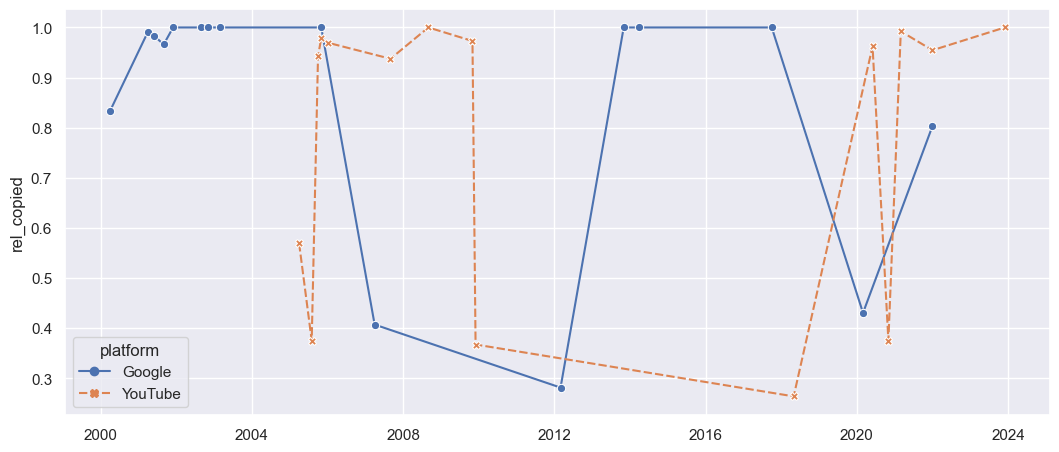

In [6]:
platforms = ['Twitter','FB','Instagram']
platforms = ['Google','YouTube']
#platforms = ['PayPal','Venmo']
threshold = .9
result_df = compare_timelines(metadata, embeddings,platforms,threshold)

sns.set(rc={'figure.figsize':(12.7,5.27)})
sns.lineplot(x=result_df.index,y='rel_copied',
                hue='platform',
                style="platform",
                markers=True,
                data=result_df
            )

/Users/kasparbeelen/anaconda3/envs/tou/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kasparbeelen/anaconda3/envs/tou/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='rel_additions'>

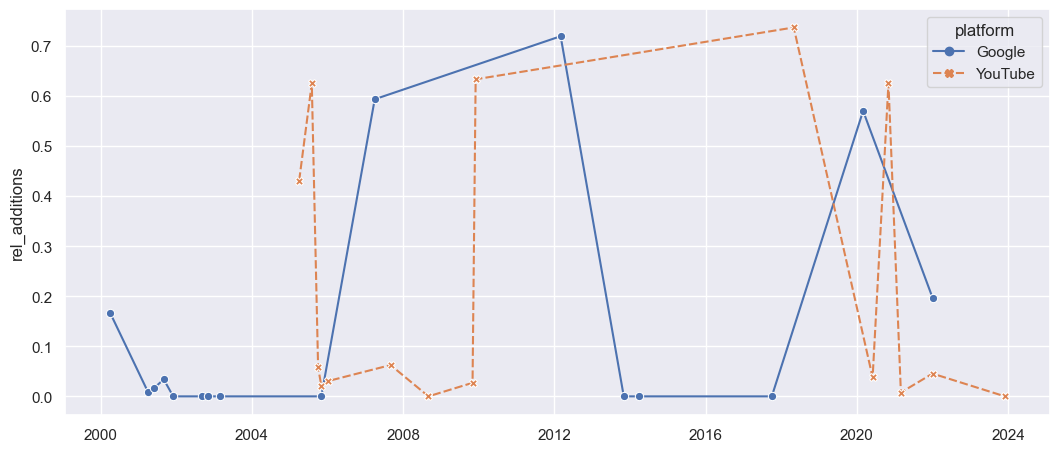

In [7]:
sns.set(rc={'figure.figsize':(12.7,5.27)})
sns.lineplot(x=result_df.index,y='rel_additions',
                hue='platform',
                style="platform",
                markers=True,
                data=result_df
            )

/Users/kasparbeelen/anaconda3/envs/tou/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kasparbeelen/anaconda3/envs/tou/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='rel_deletions'>

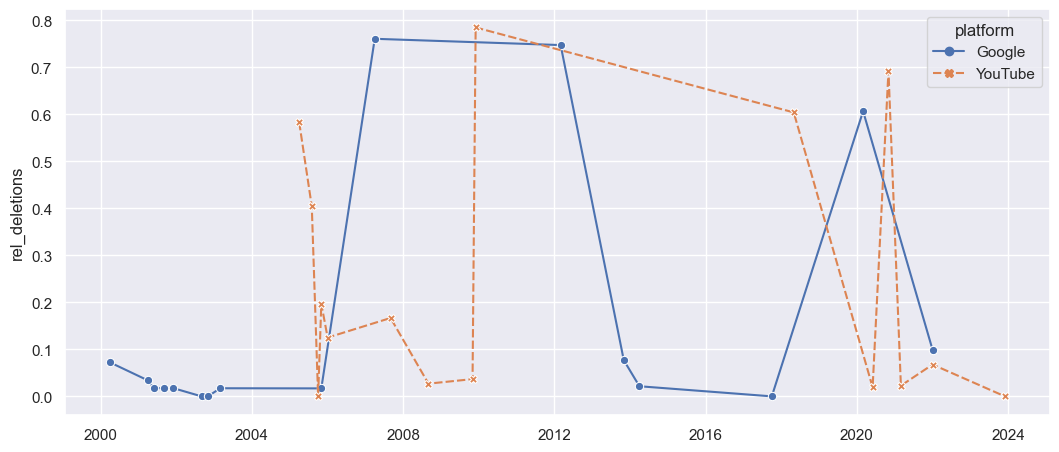

In [8]:
sns.set(rc={'figure.figsize':(12.7,5.27)})
sns.lineplot(x=result_df.index,y='rel_deletions',
                hue='platform',
                style="platform",
                markers=True,
                data=result_df
            )

In [12]:
platforms = list(metadata.platform.unique())
threshold = .9
result_df = compare_timelines(metadata, embeddings, platforms,threshold)


  0%|          | 0/16 [00:00<?, ?it/s]

100%|██████████| 48/48 [00:20<00:00,  2.38it/s]
0it [00:00, ?it/s]
100%|██████████| 14/14 [00:00<00:00, 38.97it/s]


<Axes: xlabel='rel_copied', ylabel='platform'>

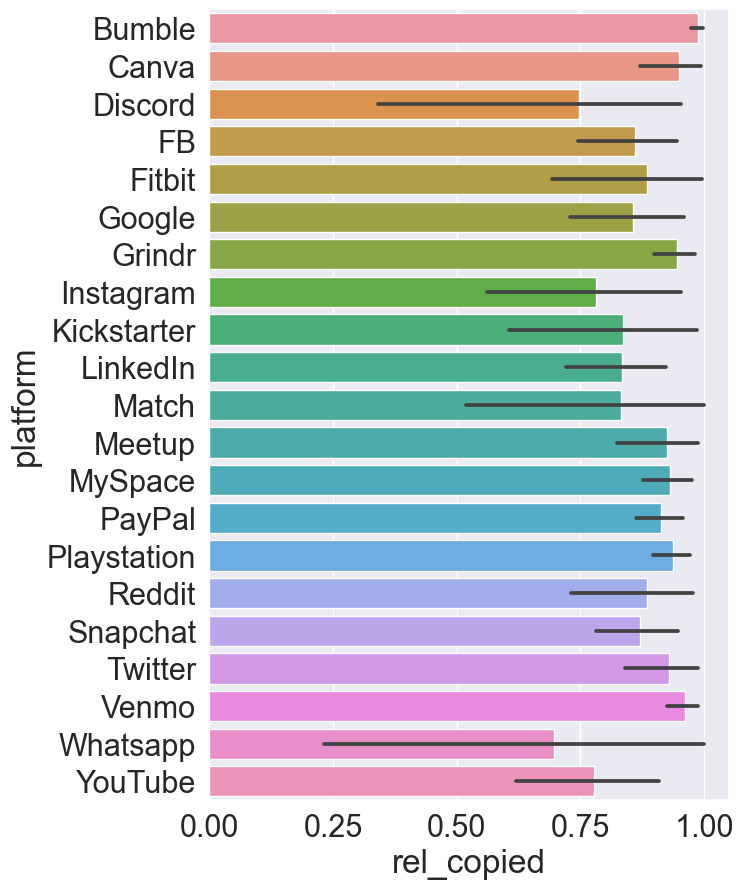

In [13]:
sns.set(rc={'figure.figsize':(6.7,10.27)})
sns.set(font_scale=2)
result_df= result_df.sort_values(by='platform')
sns.barplot(y='platform',x='rel_copied',data=result_df)

<Axes: xlabel='rel_additions', ylabel='platform'>

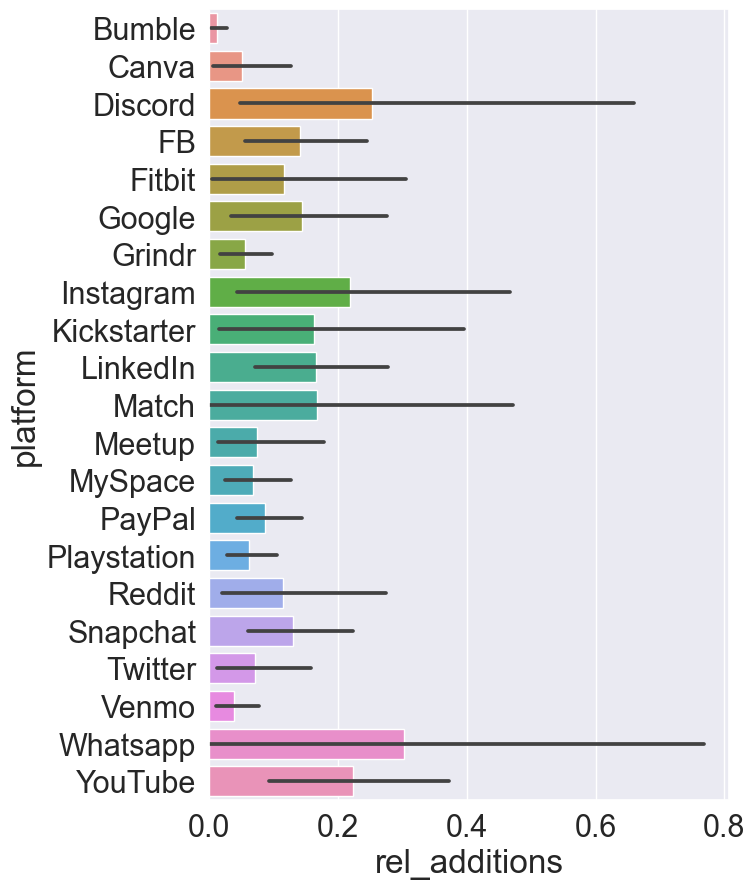

In [14]:
sns.set(rc={'figure.figsize':(6.7,10.27)})
sns.set(font_scale=2)
result_df= result_df.sort_values(by='platform')
sns.barplot(y='platform',x='rel_additions',data=result_df)

<Axes: xlabel='rel_deletions', ylabel='platform'>

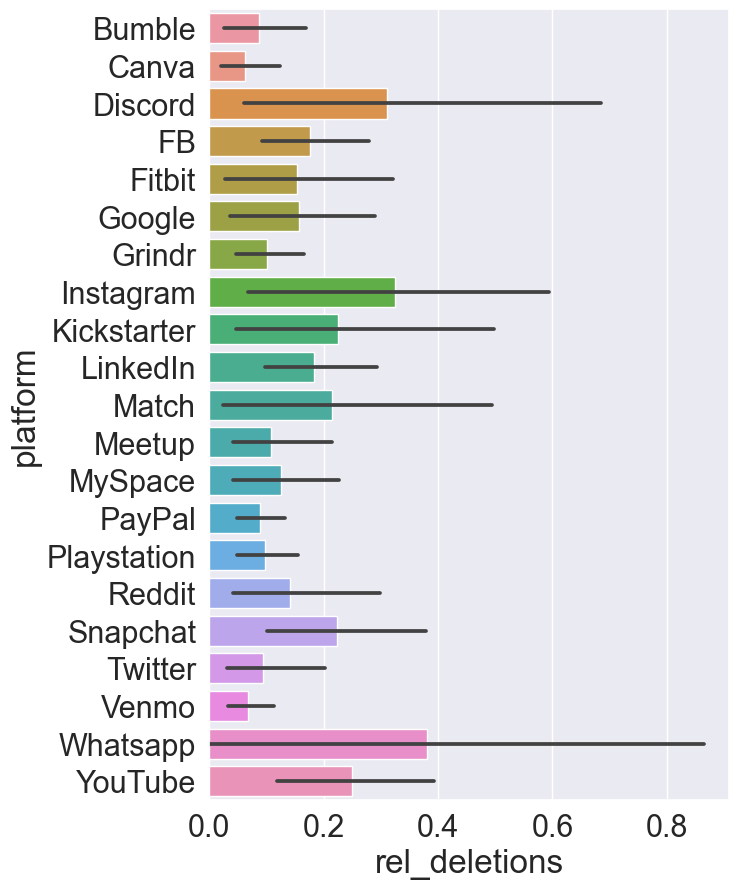

In [15]:
sns.set(rc={'figure.figsize':(6.7,10.27)})
sns.set(font_scale=2)
result_df= result_df.sort_values(by='platform')
sns.barplot(y='platform',x='rel_deletions',data=result_df)

# Clustering

In [18]:
platforms = list(metadata.platform.unique())
platforms.remove('PayPal')
print(platforms)

['Twitter', 'Bumble', 'Discord', 'Playstation', 'Kickstarter', 'Match', 'MySpace', 'Google', 'Canva', 'Fitbit', 'Grindr', 'YouTube', 'Venmo', 'FB', 'Paypal', 'Reddit', 'Meetup', 'Instagram', 'Snapchat', 'Whatsapp', 'LinkedIn']


In [20]:
threshold = .9
result_df = compare_timelines(metadata, embeddings, platforms,threshold)

100%|██████████| 24/24 [00:00<00:00, 40.16it/s]
0it [00:00, ?it/s]
100%|██████████| 14/14 [00:00<00:00, 32.33it/s]


In [22]:

new_length = 100  # Define the new length
interp_funcs = [interp1d(np.linspace(0, 1, len(p)), p) for p in result_df.past_projection.values]
matrix = np.array([interp(np.linspace(0, 1, new_length)) for interp in interp_funcs])
matrix.shape

(243, 100)

In [23]:

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(matrix)

In [26]:
freqs = dict(Counter(kmeans.labels_))
print(sum(freqs.values()))
freqs = {k: round(v/ sum(freqs.values()),2) for k,v in freqs.items()}
freqs

243


{1: 0.1, 0: 0.78, 2: 0.12}

<Axes: >

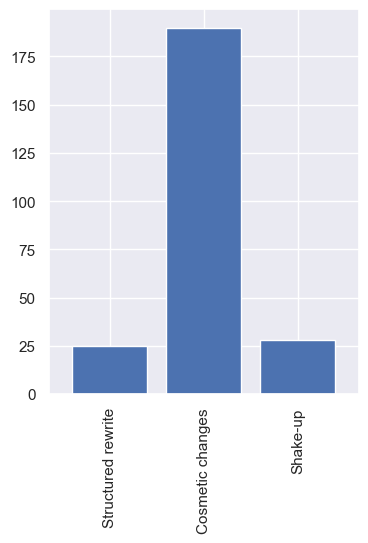

In [28]:
xlabs= {2: 'Shake-up',
0: 'Cosmetic changes',
1: 'Structured rewrite'}
new_dict = {xlabs[k]: v for k,v in dict(Counter(kmeans.labels_)).items()}
pd.Series(new_dict).plot(kind='bar',width=.8,figsize=(4,5))

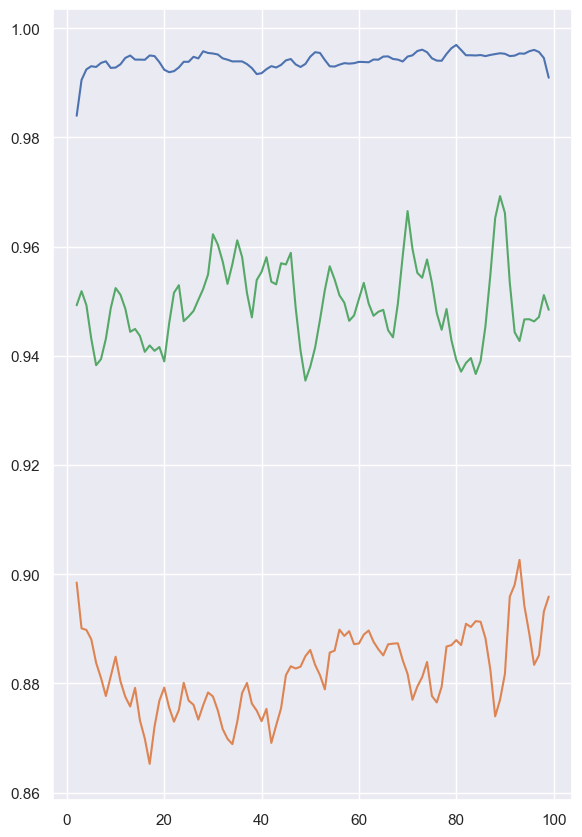

In [29]:
for i in range(n_clusters):
    pd.Series(np.mean(matrix[np.where(kmeans.labels_==i)],axis=0)).rolling(3).mean().plot()


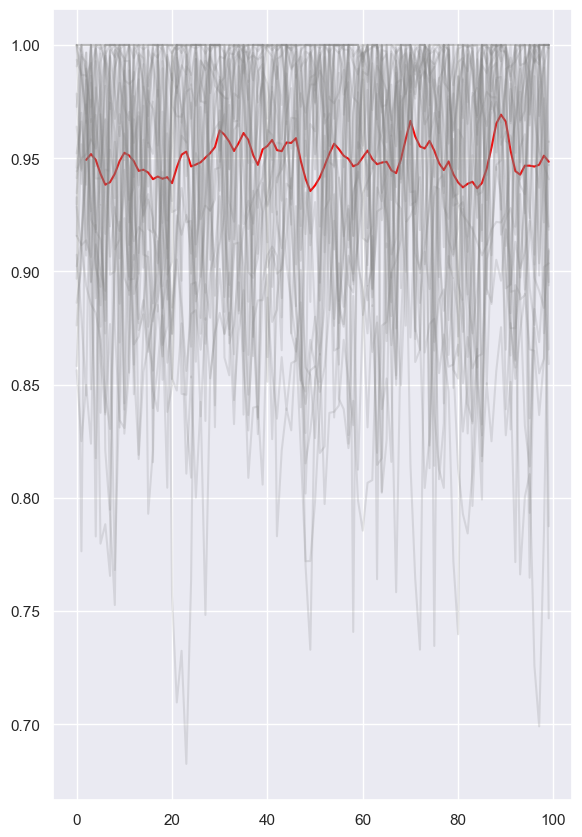

In [30]:
target_lab = 2
pd.Series(np.mean(matrix[np.where(kmeans.labels_==target_lab)],axis=0)).rolling(3).mean().plot(color='red')
for a in matrix[np.where(kmeans.labels_==target_lab)]:
    pd.Series(a).plot(color='grey', alpha=.2)

104


<Axes: >

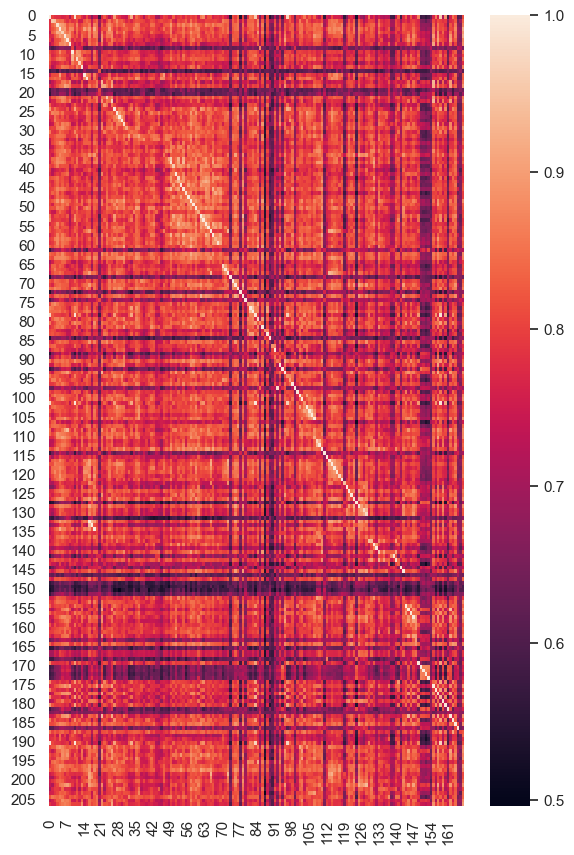

In [31]:
idx = np.where(kmeans.labels_==target_lab)[0][10]
print(idx)
sns.heatmap(result_df.iloc[idx].matrix)

<Axes: xlabel='platform'>

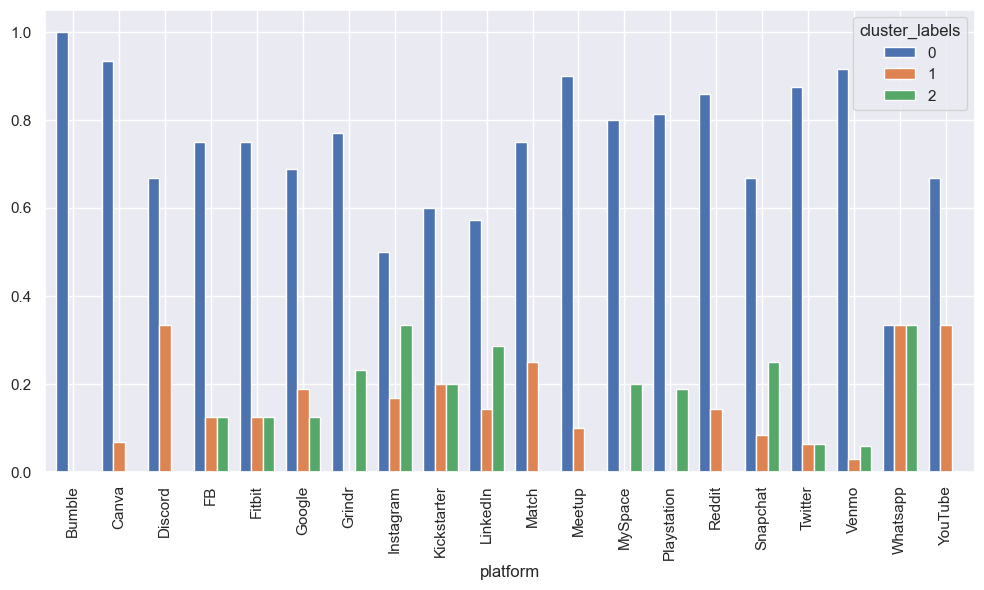

In [32]:
result_df['cluster_labels'] = kmeans.labels_
by_platform = result_df.groupby(['platform','cluster_labels'])['platform'].count()#.reset_index()
(by_platform.unstack(0) / by_platform.unstack(0).sum(axis=0)).T.plot(kind='bar', width=.75, figsize=(12,6))


<Axes: xlabel='year'>

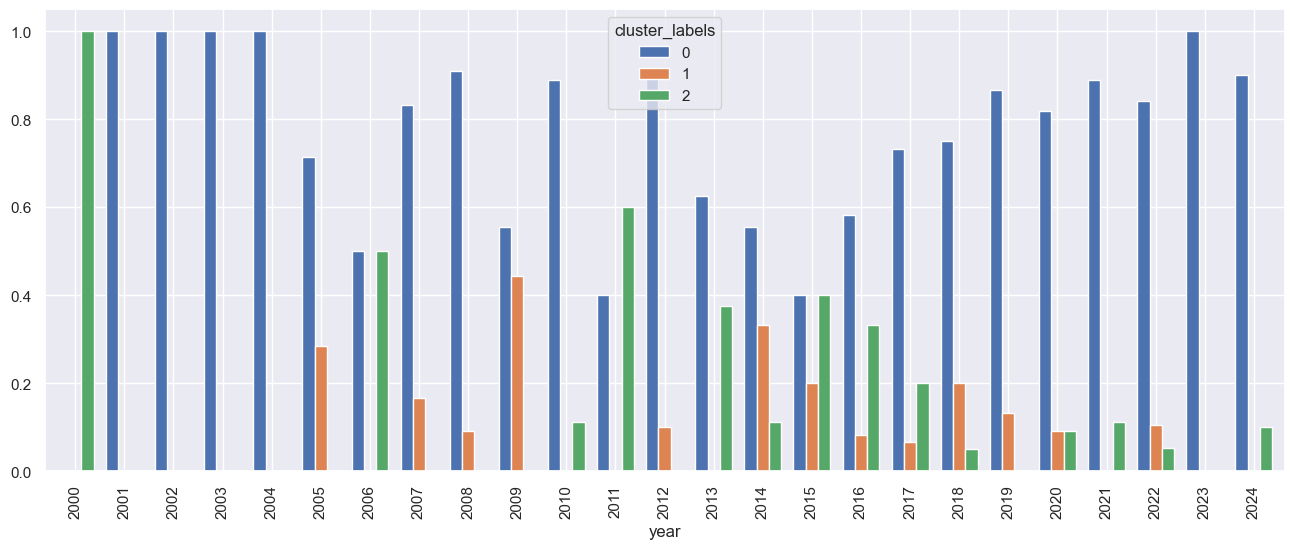

In [33]:
result_df['date'] = result_df.index
result_df['year'] = result_df['date'].apply(lambda x: x.year)
by_year = result_df.groupby(['year','cluster_labels'])['platform'].count()#.reset_index()
(by_year.unstack(0) / by_year.unstack(0).sum(axis=0)).T.fillna(.0).plot(kind='bar', width=.75, figsize=(16,6))


# Convergence

In [50]:
metadata['date'] = metadata.year.apply(lambda x:datetime.strptime(str(x), "%Y%m%d").date() )

# platform_t = 'Instagram'
# platform_c = 'FB'

# platform_t = 'YouTube'
# platform_c = 'Google'

# platform_t = 'Venmo'
# platform_c = 'PayPal'



In [51]:
platforms = list(metadata.platform.unique())
platforms.remove('Paypal')

In [54]:

results = defaultdict(dict)
for i,j in tqdm(list(combinations(platforms,r=2))):
    results[i][j] = convergence(metadata, embeddings, i,j)
    results[j][i] = convergence(metadata, embeddings, j,i)
    

100%|██████████| 210/210 [06:17<00:00,  1.80s/it]


<Axes: xlabel='date'>

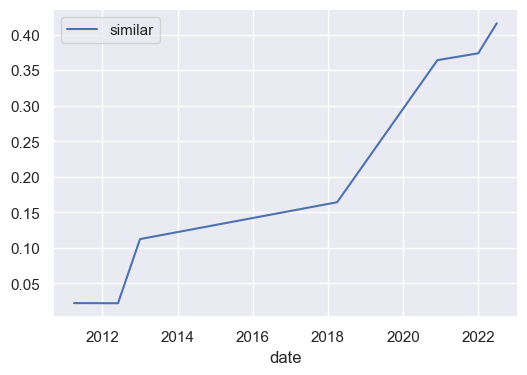

In [80]:
platform_t = 'Instagram'
platform_c = 'FB'

# platform_t = 'YouTube'
# platform_c = 'Google'

# platform_t = 'Venmo'
# platform_c = 'PayPal'
results[platform_t][platform_c][['date','similar']].plot(x='date',y='similar',kind='line',figsize=(6,4))

In [73]:
rows = []
for i,j in tqdm(results.items()):
    for k,v in j.items():
        try:
            # try to figure out why this exception occurs
            rows.append([i,k,list(v['mean'].values)])
        except Exception as  e:
            print(i,k,e)
            continue
conv_df = pd.DataFrame(rows,columns=['source','target','mean'])


100%|██████████| 21/21 [00:00<00:00, 6165.94it/s]

MySpace Discord 'mean'
Meetup Discord 'mean'


<Axes: ylabel='Density'>

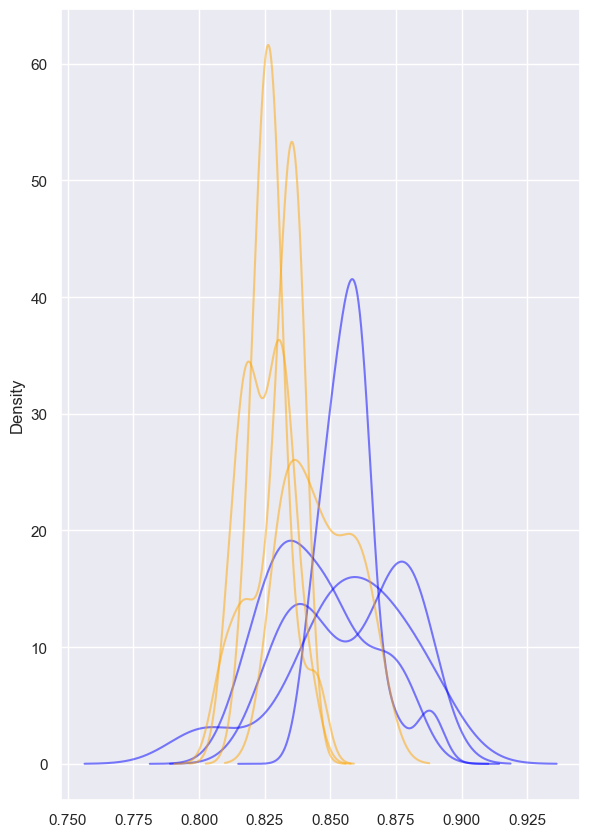

In [64]:
sims = [s for a in  
           conv_df[(conv_df.source=='Twitter') & (conv_df.target.isin(['FB', 'Instagram','LinkedIn']))]['mean'].values
           for s in a
           ]
pd.Series(sims).plot(kind='density', color='blue', alpha=.5)

sims = [s for a in  
           conv_df[(conv_df.source=='FB') & (conv_df.target.isin(['Twitter', 'Instagram','LinkedIn']))]['mean'].values
           for s in a
           ]
pd.Series(sims).plot(kind='density', color='blue', alpha=.5)

sims = [s for a in  
           conv_df[(conv_df.source=='Instagram') & (conv_df.target.isin(['Twitter', 'FB','LinkedIn']))]['mean'].values
           for s in a
           ]
pd.Series(sims).plot(kind='density', color='blue', alpha=.5)

sims = [s for a in  
           conv_df[(conv_df.source=='LinkedIn') & (conv_df.target.isin(['Twitter', 'FB','Instagram']))]['mean'].values
           for s in a
           ]
pd.Series(sims).plot(kind='density', color='blue', alpha=.5)

sims = [s for a in  
           conv_df[(conv_df.source=='Twitter') & (conv_df.target.isin(['PayPal', 'Venmo']))]['mean'].values
           for s in a
           ]
pd.Series(sims).plot(kind='density',color='orange', alpha=.5)

sims = [s for a in  
           conv_df[(conv_df.source=='FB') & (conv_df.target.isin(['PayPal', 'Venmo']))]['mean'].values
           for s in a
           ]
pd.Series(sims).plot(kind='density',color='orange', alpha=.5)

sims = [s for a in  
           conv_df[(conv_df.source=='Instagram') & (conv_df.target.isin(['PayPal', 'Venmo']))]['mean'].values
           for s in a
           ]
pd.Series(sims).plot(kind='density',color='orange', alpha=.5)

sims = [s for a in  
           conv_df[(conv_df.source=='LinkedIn') & (conv_df.target.isin(['PayPal', 'Venmo']))]['mean'].values
           for s in a
           ]
pd.Series(sims).plot(kind='density',color='orange', alpha=.5)

# Fin.